## Observations and Insights 

%load_ext lab_black

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data_complete = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_data_complete.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [2]:
df = mouse_study_data_complete
df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [3]:
# Checking the number of mice.
mouse_count = df["Mouse ID"].value_counts().sum()
mouse_count

1893

old = df
new = old[["Mouse ID", "Timepoint"]].copy()
new

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df[df.duplicated(["Mouse ID", "Timepoint"])].value_counts().sum()

5

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df.drop_duplicates(["Mouse ID", "Timepoint"])

In [7]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].value_counts().sum()

1888

## Summary Statistics

In [8]:
df.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [10]:
drug_regimen_mean = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()

In [11]:
drug_regimen_median = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()

In [12]:
drug_regimen_var = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()

In [13]:
drug_regimen_std = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()

In [14]:
drug_regimen_sem = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

In [15]:
sum_stat_df = pd.DataFrame()
sum_stat_df["Mean Tumor Vol"] = drug_regimen_mean
sum_stat_df["Median Tumor Vol"] = drug_regimen_median
sum_stat_df["Variance"] = drug_regimen_var
sum_stat_df["Standard Deviation"] = drug_regimen_std
sum_stat_df["Standard Error of of Mean"] = drug_regimen_sem
sum_stat_df

,Mean Tumor Vol,Median Tumor Vol,Variance,Standard Deviation,Standard Error of of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

In [17]:
sum_stat_df2 = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
sum_stat_df2.agg(['mean', 'median', 'var', "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

In [33]:
drug_regimen_mice_count_df= df.groupby(["Drug Regimen"], as_index=False)["Mouse ID"].nunique()

<AxesSubplot:>

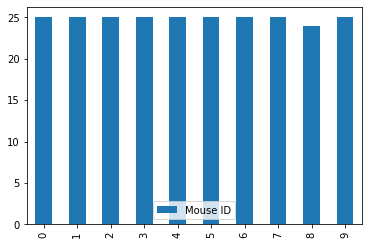

In [21]:
drug_regimen_mice_count_df.plot.bar()

In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

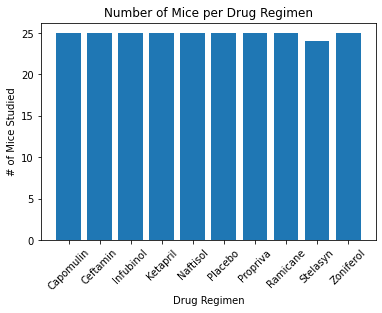

In [23]:
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice Studied")
plt.bar(drug_regimen_mice_count_df["Drug Regimen"], drug_regimen_mice_count_df["Mouse ID"])
plt.xticks(rotation=45)
plt.show()

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [54]:
male_female_df = df.groupby(["Sex"], as_index=False)["Mouse ID"].count()
male_female_df.rename(columns={"Mouse ID": "Mice Gender"}, inplace=True)
male_female_df

,Sex,Mice Gender
0,Female,930
1,Male,958


<AxesSubplot:ylabel='Mice Gender'>

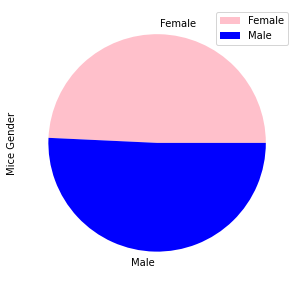

In [63]:

male_female_df.plot.pie(y = "Mice Gender",labels=["Female", "Male"], colors=["pink", "blue"], figsize = (5,5))


In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [28]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [31]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
